In [ ]:
# fn to gd:
# cos(2*pi*x) + x**2

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from IPython import display

In [22]:
x=sp.symbols('x')

fx=sp.cos(2*np.pi*x) + x**2
df=fx.diff(x)

print(f'f(x):')
display(fx)

print(f'df(x):')
display(df)

f(x):


x**2 + cos(6.28318530717959*x)

df(x):


2*x - 6.28318530717959*sin(6.28318530717959*x)

In [18]:
f_func=sp.lambdify(x,fx)
display(f_func)

<function _lambdifygenerated(x)>

In [10]:
df_func=sp.lambdify(x,df)
display(df_func)

<function _lambdifygenerated(x)>

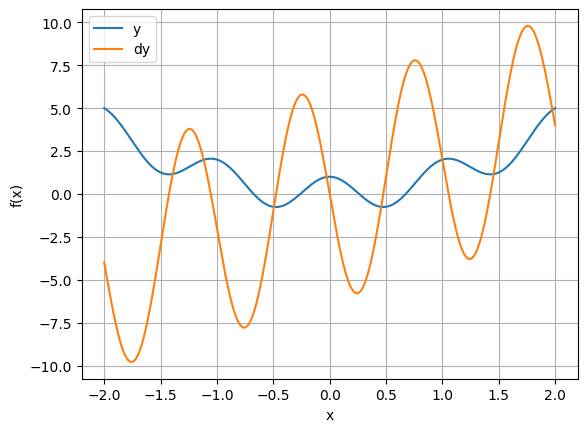

In [28]:
x_vals=np.linspace(-2,2,2001)

plt.plot(x_vals,f_func(x_vals),x_vals,df_func(x_vals))
# plt.xlim(x_vals[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [30]:
x_vals=np.linspace(-2,2,2001)

u=np.random.choice(x_vals,1)
print(f'Initial u:{u}')

# track=[float(u)]

learning_rate=.01
training_epochs=100

for i in range(training_epochs):
    grad=df_func(u)
    u=u-learning_rate*grad
    # track.append(float(u))

print(f'Final u:{u}')

Initial u:[-0.416]
Final u:[-0.47580245]
